**Business Case:To predict future flight prices and plan their journey accordingly.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the Data**

In [ ]:
data = pd.read_excel('/content/Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Basic Check**

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.size

117513

 **EDA**

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**

**.dt.month method will extract only month of that date**

**Date Of Journey**

In [ ]:
## Converting the data into month and day

data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day

data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month

data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


**Departure Time**

In [ ]:
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour

data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

data.drop(['Dep_Time'],axis=1 , inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


**Arrival Time**

In [ ]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour

data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

data.drop(['Arrival_Time'],axis=1 , inplace=True)

In [ ]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [ ]:
data["Duration_hours"] = duration_hours

data["Duration_mins"] = duration_mins

data.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## **Univariate Analysis**

**Airline**

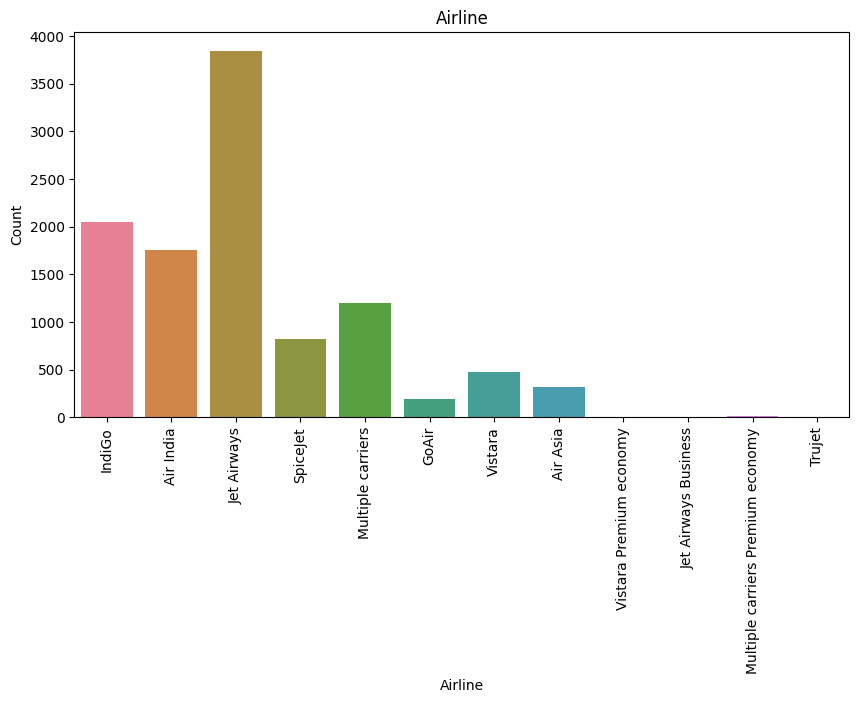

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Airline',hue='Airline',data=data)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Airline')
plt.xticks(rotation=90)
plt.show()



1.   From the airline graph it can be seen that Jet Airways has the most number of passengers flying from it
2.   There are airlines with least no of passengers that is Vistara preimum economy , Jet Airways business , Multiple carries maximum economy , trujet

 **Source**

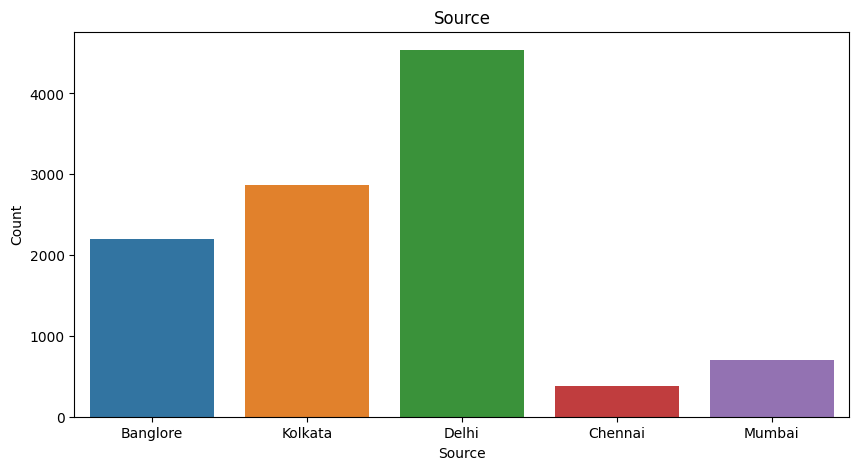

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Source',hue='Source',data=data)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source')
plt.show()



1.   From the above graph, it can be shown that Delhi is the most preferable source for flying, followed by Kolkata, Banglore, and Mumbai
2.   The Least flyable source in Chennai



 **Destination**

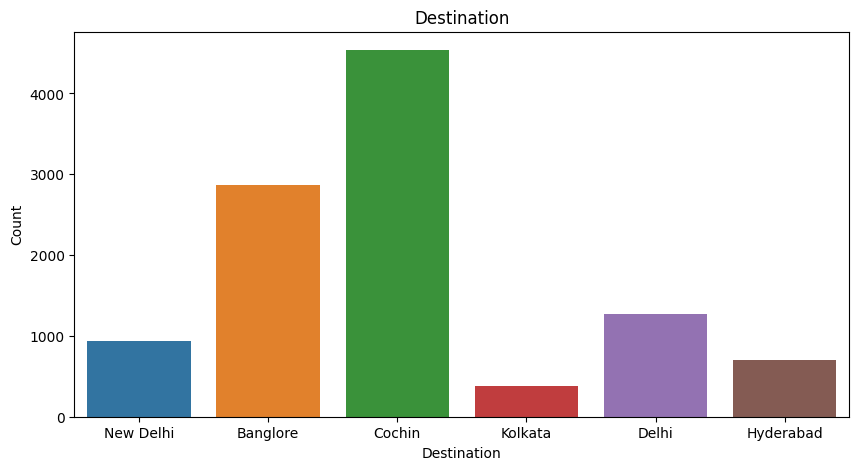

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Destination',hue='Destination',data=data)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination')
plt.show()



1.   Cochin is the most frequent destination, followed by Bangalore
2.   Delhi and New Delhi have moderate counts, Kolkata and Hyderabad have the fewest occurrences.



**Total Stops**

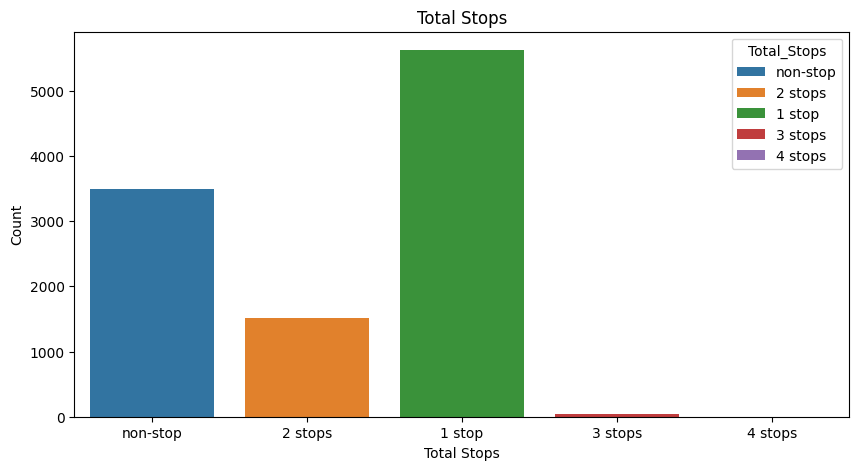

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Stops',hue='Total_Stops',data=data)
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.title('Total Stops')
plt.show()



1.   The majority of flights have 1 stop, with a count exceeding 5000, significantly higher than any other category.
2.   Non-stop flights follow with over 3000 counts, while 2 stops, 3 stops, and 4 stops are much less frequent, with the 3 and 4 stop categories being almost negligible.



**Bivariate Analysis**

# Analyzing Airline Vs Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

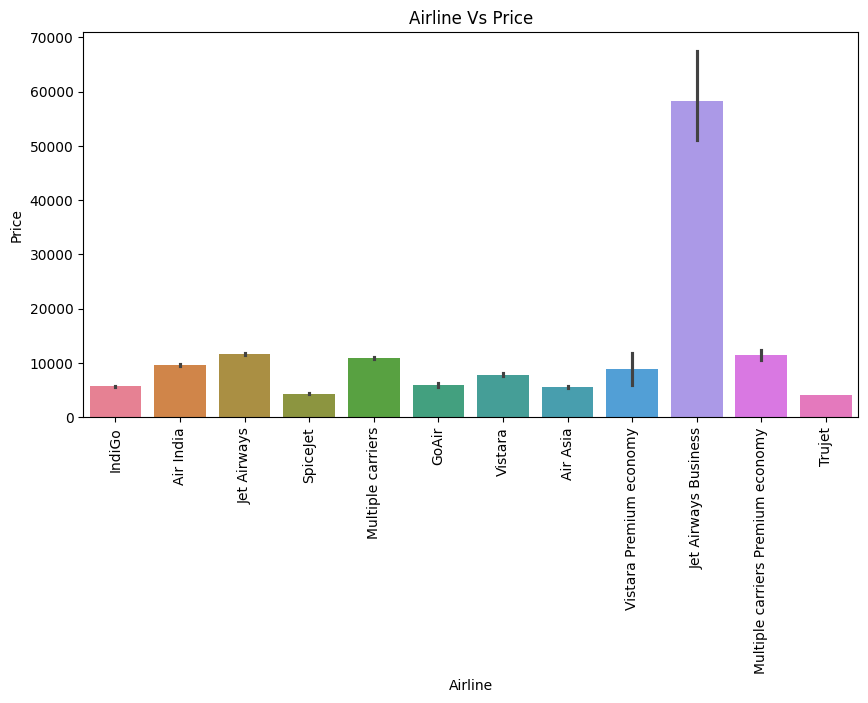

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Airline',y='Price',data=data,hue='Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Airline Vs Price')
plt.xticks(rotation=90)



1.   The "Jet Airways Business" class stands out with significantly higher prices, reaching up to around ₹70,000, much higher than all other airlines or classes.
2.   The other airlines, including IndiGo, Air India, Jet Airways (non-business), SpiceJet, and GoAir, have similar price ranges between ₹5000 and ₹15000, with Vistara Premium Economy and Multiple Carriers Premium Economy slightly higher but still far below Jet Airways Business.



# Source Vs Price

Text(0.5, 1.0, 'Source Vs Price')

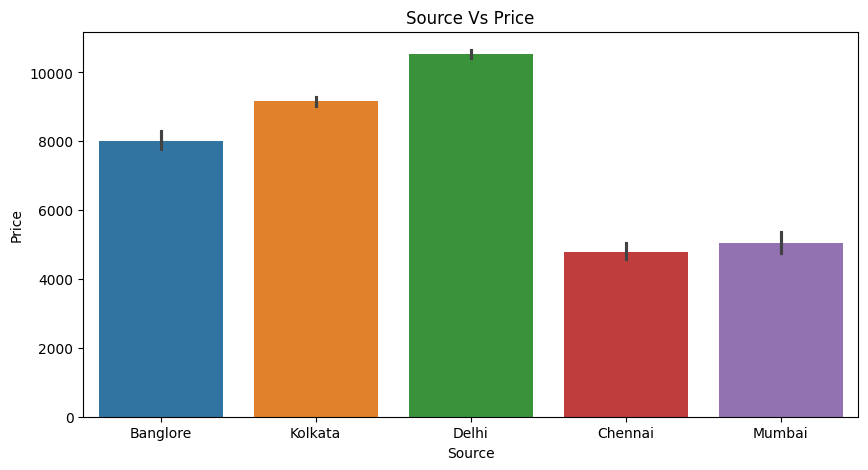

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Source',y='Price',data=data,hue='Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Source Vs Price')




1.   Flights originating from Delhi have the highest average price, exceeding ₹10,000, making it the most expensive source city in the chart.
2.   Flights from Chennai and Mumbai have the lowest average prices, around ₹6000, significantly lower than other cities like Delhi, Kolkata, and Bangalore.



# Destination Vs Price

Text(0.5, 1.0, 'Destination Vs Price')

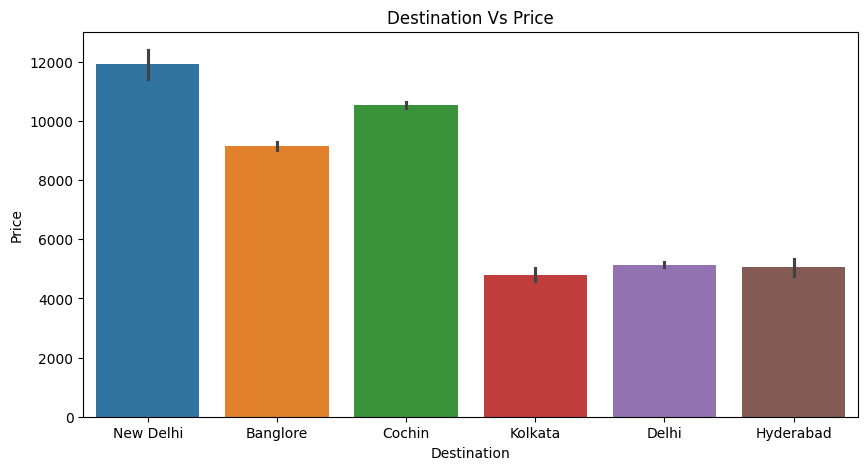

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Destination',y='Price',data=data,hue='Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Destination Vs Price')




1.   New Delhi has the highest average price, close to 12,000.
2.   Cochin and Bangalore follow, with prices just under 12,000 and 10,000, respectively, Kolkata, Delhi, and Hyderabad have lower average prices, with Kolkata having the lowest among them.



# Stops vs Price

Text(0.5, 1.0, 'Total_Stops Vs Price')

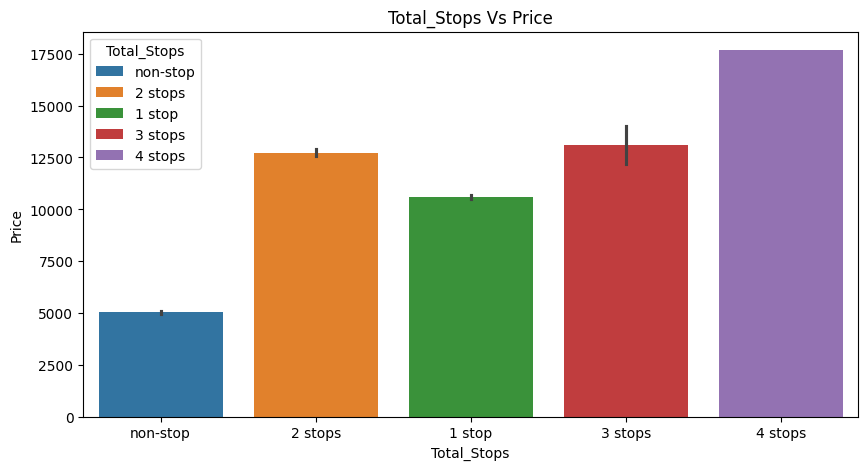

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=data,hue='Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Total_Stops Vs Price')



1.   Flights with 4 stops have the highest average price, followed by 3 stops and 2 stops.

2.   Flights from Chennai and Mumbai have the lowest average prices, around ₹6000, significantly lower than other cities like Delhi, Kolkata, and Bangalore.



# Multivariate Anaysis

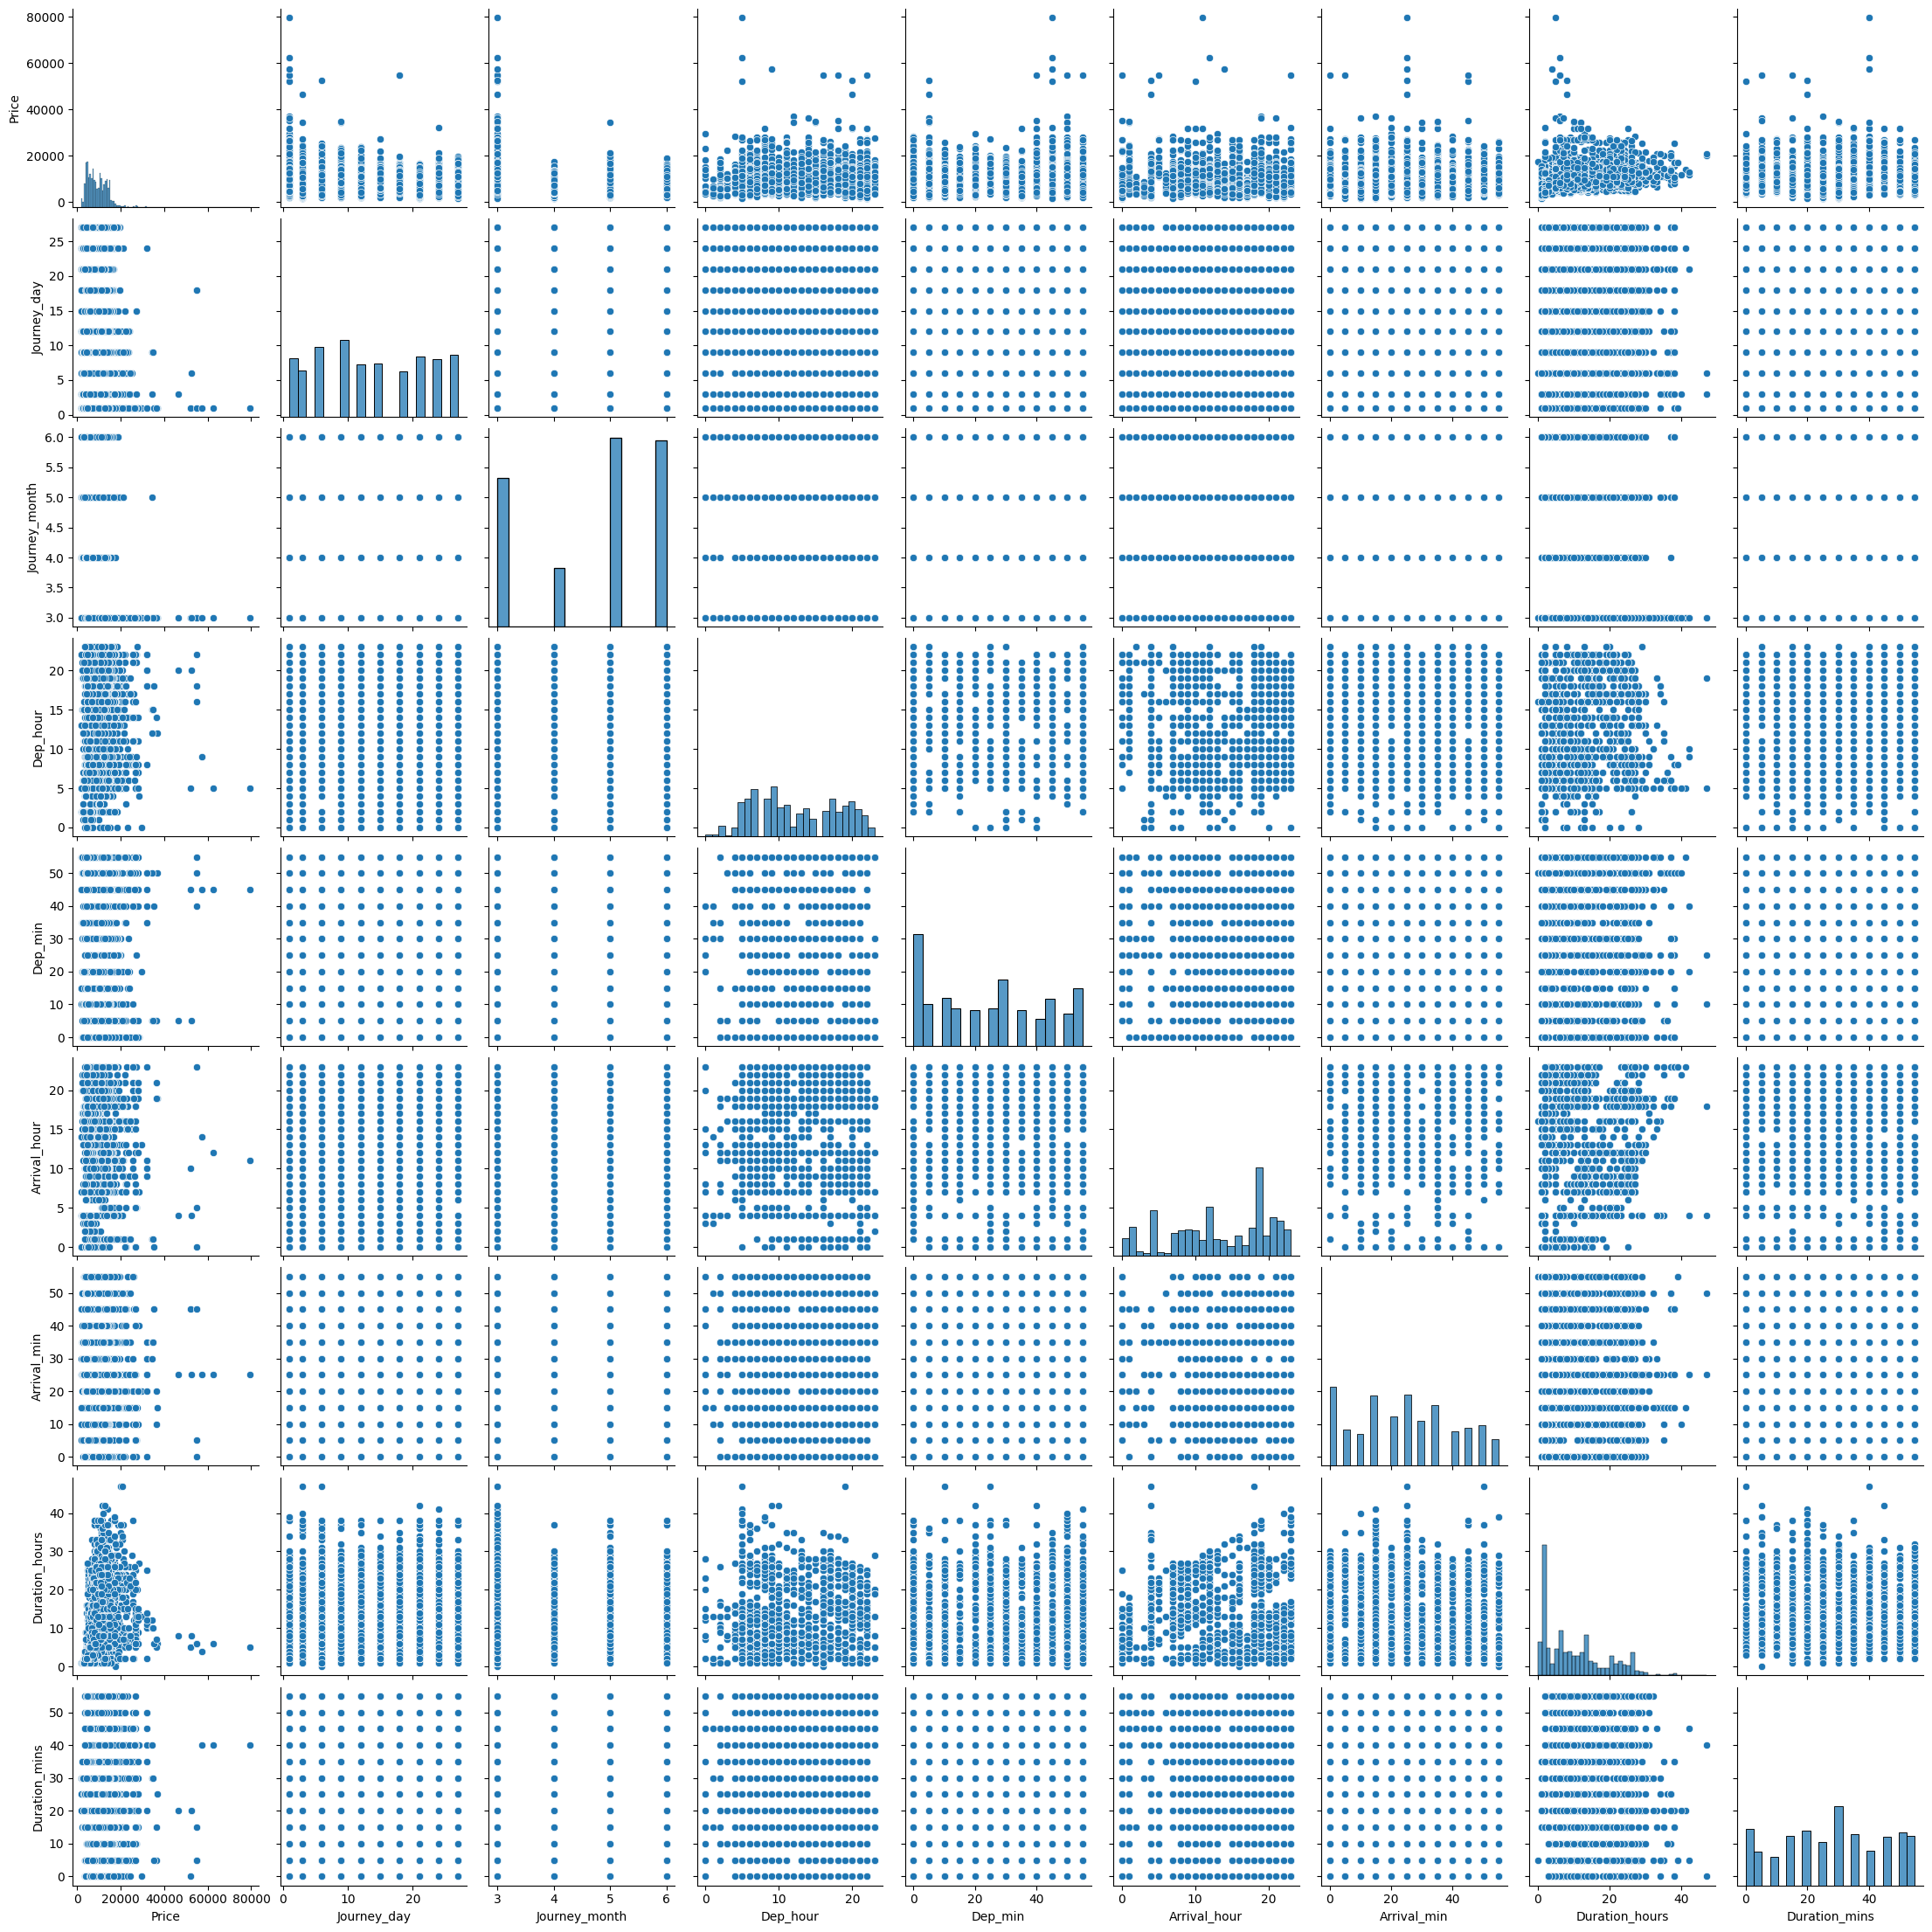

In [ ]:
sns.pairplot(data)
plt.show()

# Data Preprocessing

**Data Preprocessing**



1.   Ckeck Missing Value
2.   Convert categorical to numerical
3.   Check outliers & Impute outliers
4.  Feature transformation

   **Feature scaling**

1.   Drop unique & Constant Column   
2.  Check correlation with heatmap & Remove highly correlated feature
3.   Check Duplicates
4.   Principle component analysis
5.   Save pre-process data





 **1] Checking Null Values**

**There is only 1 null value in total_stops column**

In [ ]:
data.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Total_Stops,1
Additional_Info,0
Price,0
Journey_day,0
Journey_month,0
Dep_hour,0


# Imputing Missing Value

# Route

In [ ]:
data['Route'].mode()

,Route
0,DEL → BOM → COK


In [ ]:
data.loc[data['Route'].isnull(),'Route']='DEL → BOM → COK'

# Total Stops

In [ ]:
data['Total_Stops'].mode()

,Total_Stops
0,1 stop


In [ ]:
data.loc[data['Total_Stops'].isnull(),'Total_Stops']='1 stop'

# Encoding Categorical Variable

**Technique Used**



1.   Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.
2.   Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.





## **1] Airline**

In [ ]:
data['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
data.loc[data['Airline'] == 'Jet Airways', 'Airline'] = 11
data.loc[data['Airline'] == 'IndiGo', 'Airline'] = 10
data.loc[data['Airline'] == 'Air India', 'Airline'] = 9
data.loc[data['Airline'] == 'Multiple carriers', 'Airline'] = 8
data.loc[data['Airline'] == 'SpiceJet', 'Airline'] = 7
data.loc[data['Airline'] == 'Vistara', 'Airline'] = 6
data.loc[data['Airline'] == 'Air Asia', 'Airline'] = 5
data.loc[data['Airline'] == 'GoAir', 'Airline'] = 4
data.loc[data['Airline'] == 'Multiple carriers Premium economy', 'Airline'] = 3
data.loc[data['Airline'] == 'Jet Airways Business', 'Airline'] = 2
data.loc[data['Airline'] == 'Vistara Premium economy', 'Airline'] = 1
data.loc[data['Airline'] == 'Trujet', 'Airline'] = 0


In [ ]:
data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,10,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,9,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,11,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,10,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,10,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### **2] Source**

In [ ]:
data['Source'].value_counts()

,count
Source,
Delhi,4537
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [ ]:
data.Source = data.Source.map({'Delhi':4,'Kolkata':3 , 'Banglore':2,'Mumbai':1 ,'Chennai':0})

In [ ]:
data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,10,2,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,9,3,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,11,4,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,10,3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,10,2,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### **3 ] Destination**

In [ ]:
data['Destination'].value_counts()

,count
Destination,
Cochin,4537
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


In [ ]:
data.Destination = data.Destination.map({'Cochin':5,'Banglore':4 , 'Delhi':3,'New Delhi':2 ,'Hyderabad':1 , 'Kolkata':0})

In [ ]:
data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,10,2,2,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,9,3,4,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,11,4,5,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,10,3,4,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,10,2,2,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


**4] Total Stops**

In [ ]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5626
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [ ]:
data.Total_Stops = data.Total_Stops.map({'1 stop':4,'non-stop':3 , '2 stops':2,'3 stops':1 ,'4 stops':0})

In [ ]:
data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,10,2,2,BLR → DEL,3,No info,3897,24,3,22,20,1,10,2,50
1,9,3,4,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,11,4,5,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,10,3,4,CCU → NAG → BLR,4,No info,6218,12,5,18,5,23,30,5,25
4,10,2,2,BLR → NAG → DEL,4,No info,13302,1,3,16,50,21,35,4,45


**As column such has Route and Additional info doesn't have any information realated we will drop that column**

In [ ]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
data.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,10,2,2,3,3897,24,3,22,20,1,10,2,50
1,9,3,4,2,7662,1,5,5,50,13,15,7,25
2,11,4,5,2,13882,9,6,9,25,4,25,19,0
3,10,3,4,4,6218,12,5,18,5,23,30,5,25
4,10,2,2,4,13302,1,3,16,50,21,35,4,45


**Checking Outliers**

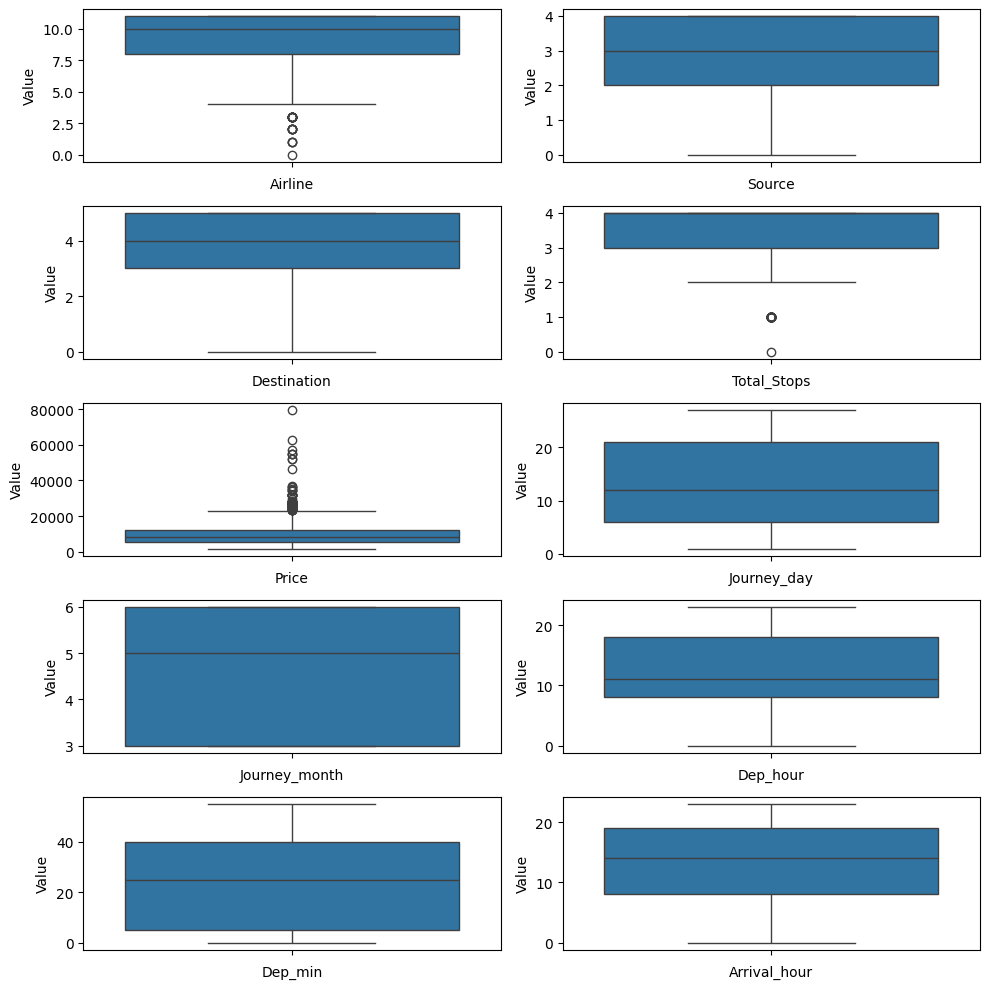

In [ ]:
plt.figure(figsize=(10,10), facecolor='white')  # canvas size
plotnumber = 1

for column in data.columns:
    if plotnumber <= 10:  # assuming there are 9 columns
        ax = plt.subplot(5, 2, plotnumber)  # 3x3 grid for 9 plots
        sns.boxplot(y=data[column], ax=ax)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Value', fontsize=10)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Outlier Handling**

**Here we are use inter quartile range to impute the outlier, because data is not normally distributed**

IQR- IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles**

**1] Airline**

In [ ]:
Q1=data['Airline'].quantile(0.25)
print('Lower quantile',Q1)
Q3=data['Airline'].quantile(0.75)
print('Upper quantile',Q3)

IQR = Q3-Q1
print('IQR',IQR)

lower_limit = Q1 - 1.5*IQR
print('lower_limit',lower_limit)

upper_limit = Q3 + 1.5*IQR
print('upper_limit',upper_limit)

Lower quantile 8.0
Upper quantile 11.0
IQR 3.0
lower_limit 3.5
upper_limit 15.5


In [ ]:
data.loc[data['Airline']>upper_limit]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins


In [ ]:
data.loc[data['Airline']<lower_limit]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
426,1,2,2,3,11793,3,3,16,0,18,35,2,35
657,2,2,2,4,52229,1,3,5,45,10,45,5,0
717,3,4,5,4,10161,21,3,7,30,19,15,11,45
1799,3,4,5,4,9845,21,3,7,30,21,0,13,30
2878,0,1,1,4,4140,6,3,13,5,16,20,3,15
2924,2,2,2,4,79512,1,3,5,45,11,25,5,40
4627,3,4,5,4,10161,21,3,8,55,19,15,10,20
4718,3,4,5,4,9845,21,3,6,0,21,0,15,0
5090,3,4,5,4,11269,21,3,6,0,13,20,7,20
5372,2,2,2,4,62427,1,3,5,45,12,25,6,40


In [ ]:
data.loc[data['Airline']<lower_limit,'Airline']=data['Airline'].median()

In [ ]:
len(data.loc[data['Airline']<lower_limit])/len(data)*100

0.0

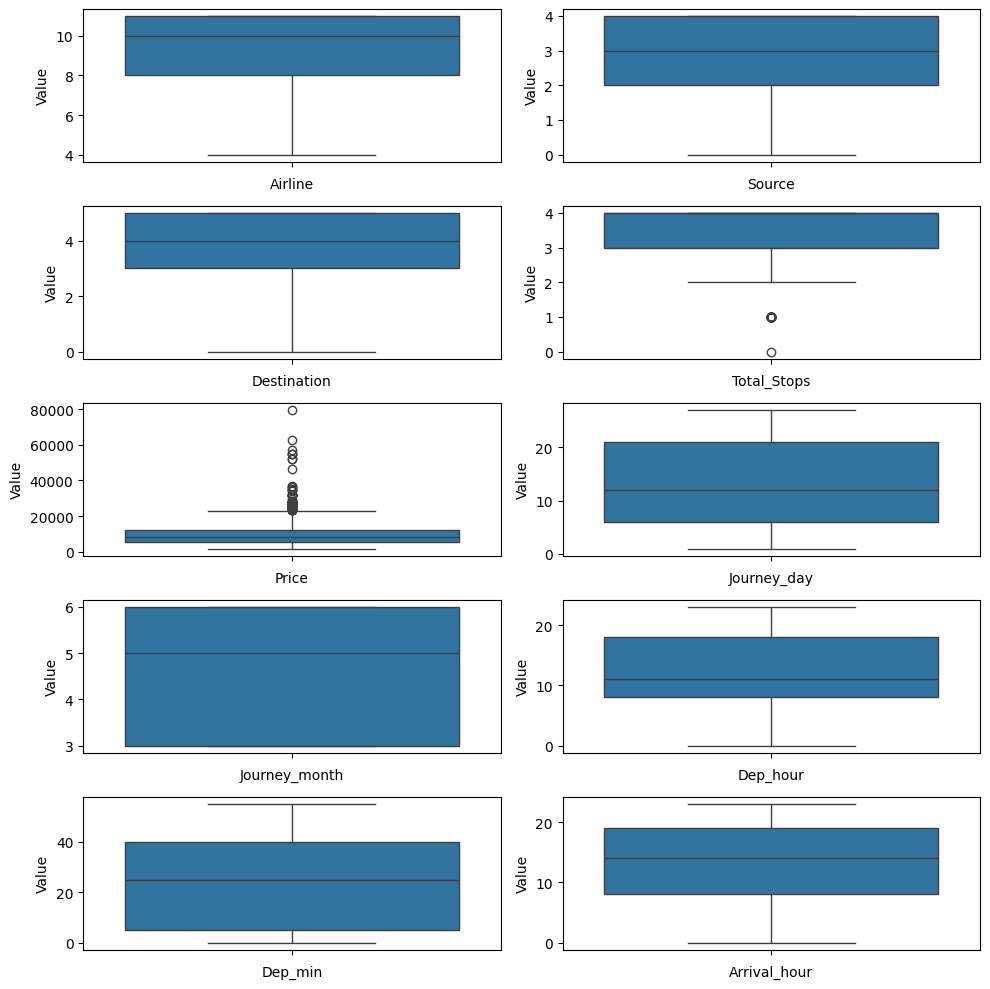

In [ ]:
plt.figure(figsize=(10,10), facecolor='white')  # canvas size
plotnumber = 1

for column in data.columns:
    if plotnumber <= 10:  # assuming there are 9 columns
        ax = plt.subplot(5, 2, plotnumber)  # 3x3 grid for 9 plots
        sns.boxplot(y=data[column], ax=ax)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Value', fontsize=10)
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observation**

Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

**Important Note**

I have not done scalining in this project has it has distrubted the quality of data

**Feature Engineering**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns

# Ensure all values are finite before calculating VIF
X = X.replace([np.inf, -np.inf], np.nan).dropna()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Feature,VIF
0,const,99.055771
1,Airline,1.158495
2,Source,38.376141
3,Destination,37.135020
4,Total_Stops,1.103463
5,Price,1.653729
6,Journey_day,1.057020
7,Journey_month,1.216167
8,Dep_hour,1.023709
9,Dep_min,1.039696


**Checking Co realtion**

In [ ]:
data.corr()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,0.062576,0.046266,0.016530,0.313524,-0.019118,0.018983,0.064238,-0.059456,-0.032533,-0.086162,0.246239,-0.081336
Source,0.062576,1.000000,0.983018,0.185005,0.358931,0.066328,0.167061,-0.035224,-0.117531,0.028373,-0.148654,0.434273,-0.095289
Destination,0.046266,0.983018,1.000000,0.168362,0.304786,0.068098,0.226301,-0.018011,-0.128006,0.029744,-0.129909,0.401761,-0.073737
Total_Stops,0.016530,0.185005,0.168362,1.000000,0.070689,-0.031975,-0.031853,0.016643,-0.068324,0.093655,-0.123040,-0.046691,-0.094872
Price,0.313524,0.358931,0.304786,0.070689,1.000000,-0.153738,-0.103651,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874
Journey_day,-0.019118,0.066328,0.068098,-0.031975,-0.153738,1.000000,-0.038378,0.002220,-0.008261,-0.003192,-0.017511,-0.022181,-0.008996
Journey_month,0.018983,0.167061,0.226301,-0.031853,-0.103651,-0.038378,1.000000,0.039112,-0.059238,-0.003941,-0.100626,0.016175,-0.040880
Dep_hour,0.064238,-0.035224,-0.018011,0.016643,0.006819,0.002220,0.039112,1.000000,-0.024806,0.005215,0.067909,0.002783,-0.023746
Dep_min,-0.059456,-0.117531,-0.128006,-0.068324,-0.024492,-0.008261,-0.059238,-0.024806,1.000000,0.043054,-0.017594,-0.021946,0.092548
Arrival_hour,-0.032533,0.028373,0.029744,0.093655,0.024264,-0.003192,-0.003941,0.005215,0.043054,1.000000,-0.154362,0.055180,-0.118345


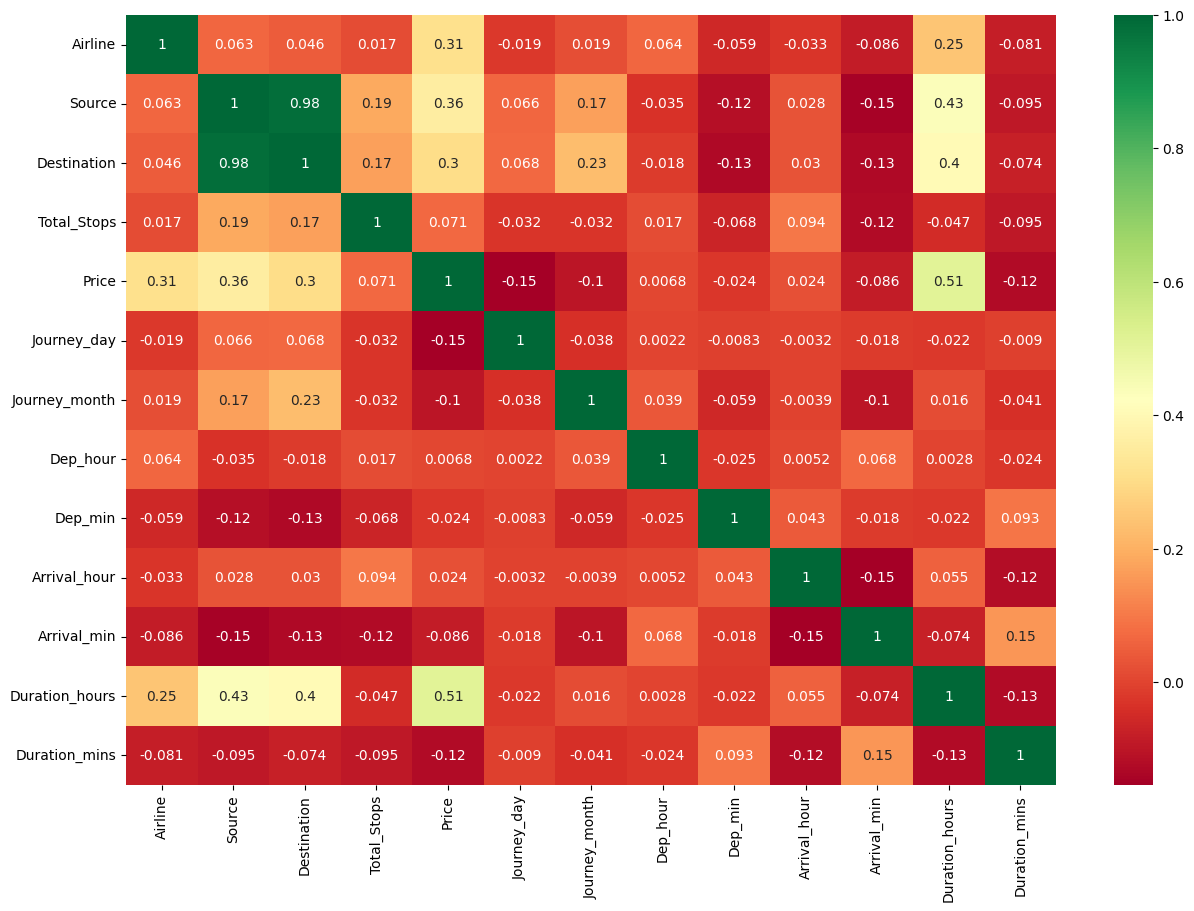

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})
plt.show()

In [ ]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,Source,Destination,0.983018
1,Destination,Source,0.983018


**Model Building**

Model Building

Loading pre-process data

Define dependant & independant features

Balancing the target feature

Split training and testing data

Model creation, prediction & evaluation

Model saving

In [ ]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split from sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8546, 12)
(2137, 12)
(8546,)
(2137,)


**Linear Regression**

In [ ]:
# Initialize and train model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(x_train, y_train)

test_data_prediction =regressor.predict(x_test)

Mae=mean_absolute_error(y_test,test_data_prediction)
print('MAE:',Mae)

R2_score = r2_score(y_test,test_data_prediction)
print('R_2Score:',R2_score)

Adjusted_r2_score = 1-(1-R2_score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MAE: 2513.0793011210035
R_2Score: 0.4448941199854771
Adjusted_r2_score: 0.4417579285729657


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

ytest = rf.predict(x_test)

Mae=mean_absolute_error(y_test,ytest)
print('MAE:',Mae)

R_2Score = r2_score(y_test,ytest)
print('R_2Score:',R_2Score)


Adjusted_r2_score = 1-(1-R_2Score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MAE: 1208.080323990443
R_2Score: 0.8108037207234217
Adjusted_r2_score: 0.8097348151907856


**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Step 1: Create dictionary with correct hyperparameter names for RandomForestRegressor
param = {
    'criterion': ['squared_error', 'absolute_error'],  # 'squared_error' is the default for RandomForestRegressor
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Step 2: Create RandomForestRegressor object
rf_clf = RandomForestRegressor(random_state=42)

# Step 3: Create RandomizedSearchCV object with correct parameter 'param_distributions'
rf_rcv = RandomizedSearchCV(estimator=rf_clf, param_distributions=param, scoring="r2", cv=4, verbose=2, n_jobs=-1)

# Step 4: Fit the data
rf_rcv.fit(x_train, y_train)

# Step 6: Get best parameters
print("Best parameters:", rf_rcv.best_params_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'absolute_error'}


In [ ]:
# Step:7 Create object and place the best paramter
rf_clf1 = RandomForestRegressor(** rf_rcv.best_params_)

# Step:8 Fitting the training data
rf_clf1.fit(x_train,y_train)

# Step:9 Prediction on test data
rf_clf1_predict = rf_clf1.predict(x_test)

Mse=mean_squared_error(y_test,rf_clf1_predict)
print('MSE:',Mse)

R_2Score = r2_score(y_test,rf_clf1_predict)
print('Hyper_Parameter_R_2Score:',R_2Score)

Adjusted_r2_score = 1-(1-R_2Score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MSE: 3530034.170980651
Hyper_Parameter_R_2Score: 0.8236176917310665
Adjusted_r2_score: 0.8226211815148579


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

ytest = dt.predict(x_test)

Mae=mean_absolute_error(y_test,ytest)
print('MAE:',Mae)

R_2Score = r2_score(y_test,ytest)
print('R_2Score:',R_2Score)

Adjusted_r2_score = 1-(1-R_2Score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MAE: 1432.2493448759942
R_2Score: 0.6889832377177065
Adjusted_r2_score: 0.687226080868654


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()

gbr.fit(x_train,y_train)

ytest=gbr.predict(x_test)

Mae=mean_absolute_error(y_test,ytest)
print('MAE:',Mae)

R_2Score = r2_score(y_test,ytest)
print('R_2Score:',R_2Score)


Adjusted_r2_score = 1-(1-R_2Score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MAE: 1499.2511736412537
R_2Score: 0.7866472002934853
Adjusted_r2_score: 0.785441817244296


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

## step 2 object creation

gbr_clf = GradientBoostingRegressor(random_state=42)

## Step 3 create randomized search cv
gbr_rcv = GridSearchCV(estimator=gbr_clf,param_grid=param,scoring="r2",cv=3,verbose=2,n_jobs=-1)

## step 4 fitting the data in gridsearch cv

gbr_rcv.fit(x_train,y_train)

# Step6 : get best parameter

print("Best parameters:", gbr_rcv.best_params_)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
 # Step:7 Create object and place the best paramter
#gbr_clf1 = RandomForestRegressor(** gbr_rcv.best_params_)

# Extract the valid parameters for RandomForestRegressor
valid_params = {key: value for key, value in gbr_rcv.best_params_.items() if key in RandomForestRegressor().get_params()}

# Create the RandomForestRegressor object with valid parameters
gbr_clf1 = RandomForestRegressor(**valid_params)

# Step:8 Fitting the training data
gbr_clf1.fit(x_train,y_train)

# Step:9 Prediction on test data
gbr_clf1_predict = gbr_clf1.predict(x_test)

Mae=mean_absolute_error(y_test,gbr_clf1_predict)
print('MAE:',Mae)

R_2Score = r2_score(y_test,gbr_clf1_predict)
print('R_2Score:',R_2Score)


Adjusted_r2_score = 1-(1-R_2Score)*(2137-1)/(2137-12-1)
print('Adjusted_r2_score:',Adjusted_r2_score)

MAE: 1857.4012056832435
R_2Score: 0.679703419878017
Adjusted_r2_score: 0.6778938346795877


**Conclusion**


The Gradient Boosting Regressor with Hyper-Parameter Tuning delivers the best results, with an R² score of 0.8236, an Adjusted R² of 0.8226, and a MAE of 1,432. This indicates high accuracy and good generalization with minimal overfitting.

The Decision Tree Regressor performs decently, achieving an R² score of 0.7866 and MAE of 1,499, while the Random Forest Regressor has the lowest performance with an R² score of 0.6889 and a MAE of 1,432.